## Applied Machine Learning :  A simple classification task

### Import required modules and load data file

In [64]:
%matplotlib notebook
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
fruits=pd.read_table("fruit_data_with_colors.txt")

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [9]:
lookup_fruit_name=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))

### Examining the data

<IPython.core.display.Javascript object>


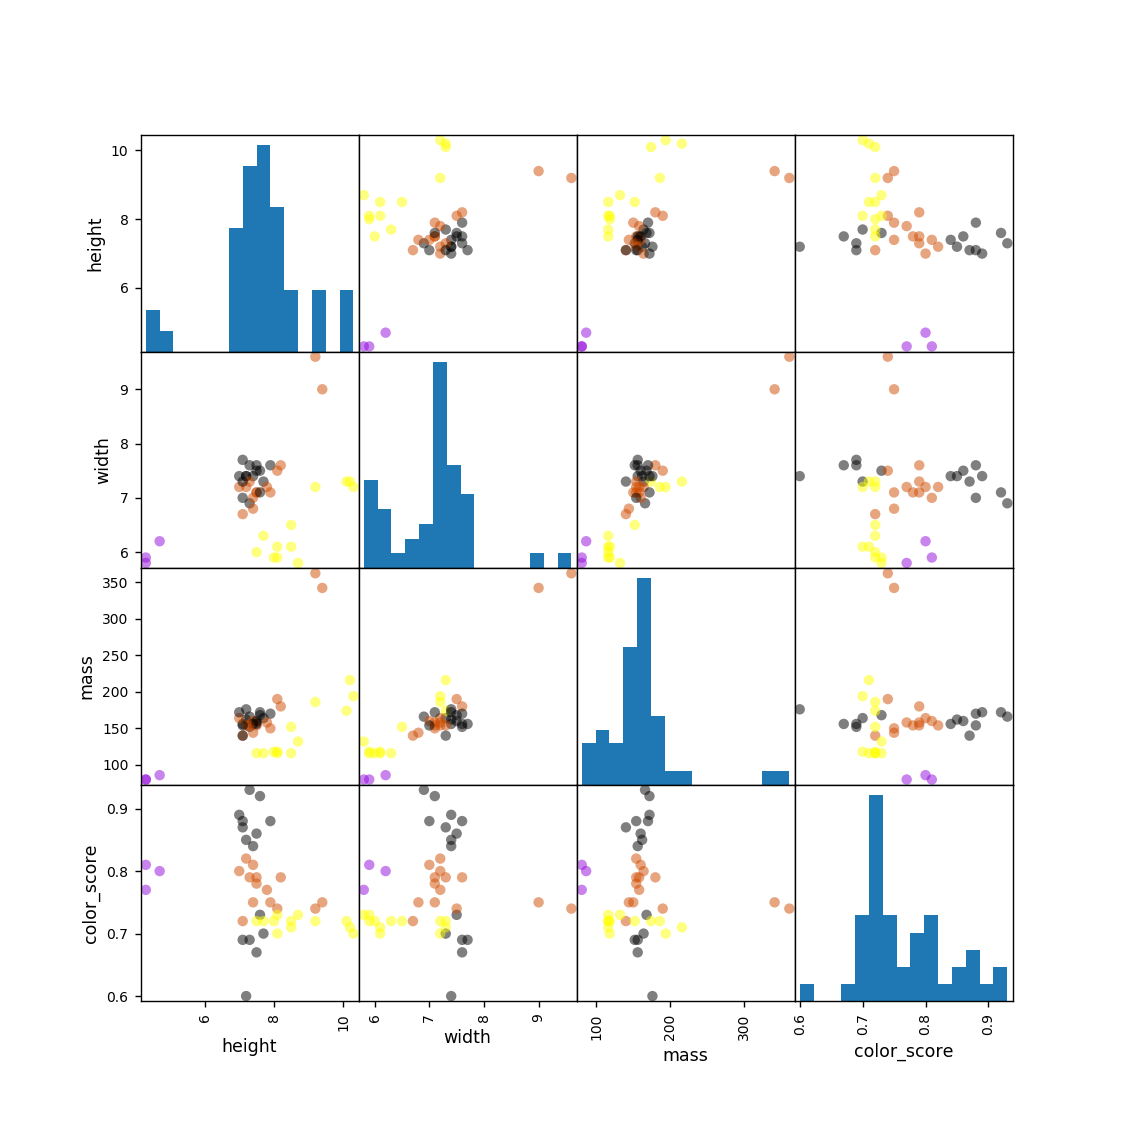

In [28]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
x=fruits[["height","width","mass","color_score"]]
y=fruits["fruit_label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69)
cmap=cm.get_cmap("gnuplot")
scatter=scatter_matrix(x_train,c=y_train,alpha=0.5,marker= "o",hist_kwds={"bins":15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


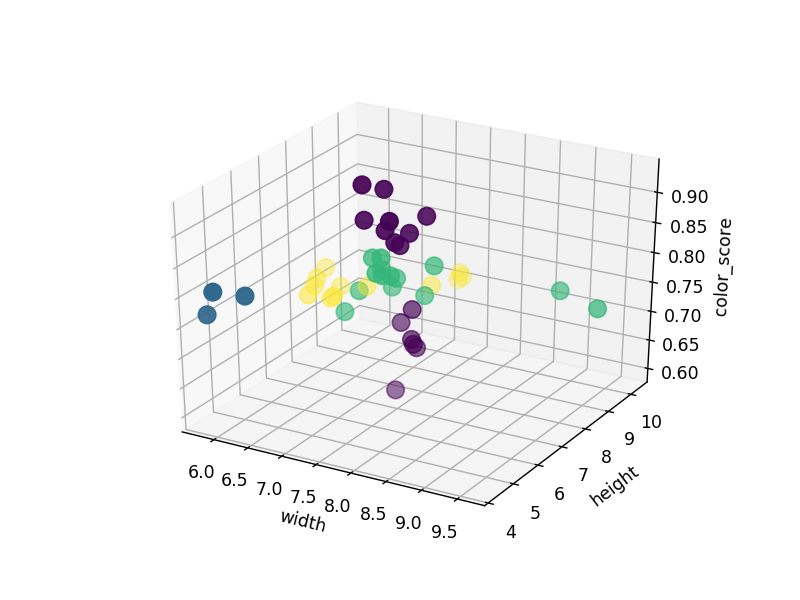

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x_train["width"],x_train["height"],x_train["color_score"],c=y_train,marker="o",s=100)
ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("color_score")
plt.show()

### Create train-test split

In [42]:
x=fruits[["mass","width","height"]]
y=fruits["fruit_label"]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

### Create classifier object

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

### Train the classifier (fit the estimator) using the training data

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [33]:
knn.score(x_test,y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [35]:
fruit_prediction=knn.predict([[20,4.3,5.5]])

In [36]:
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [37]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

In [60]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = np.array(X[['height', 'width']])
    y_mat = np.array(y)

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

<IPython.core.display.Javascript object>


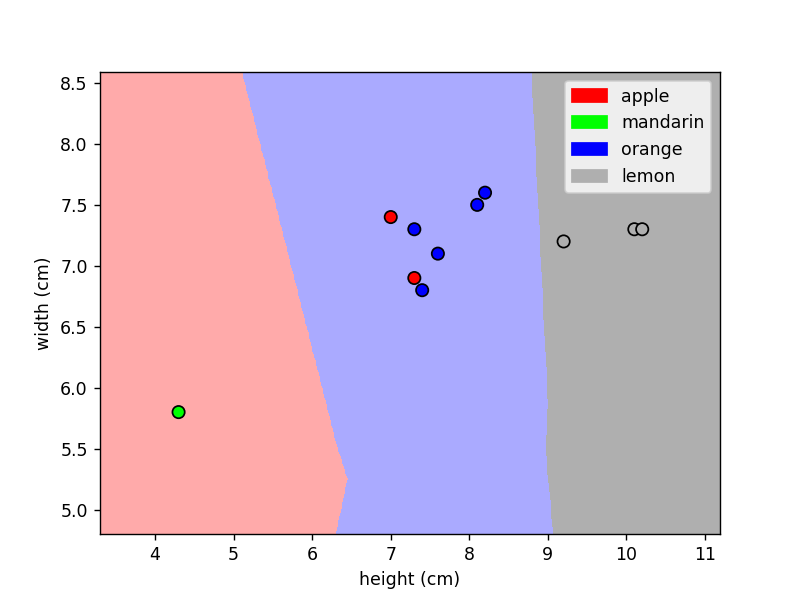

In [63]:
plot_fruit_knn(x_train, y_train, 5 , "uniform" )

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


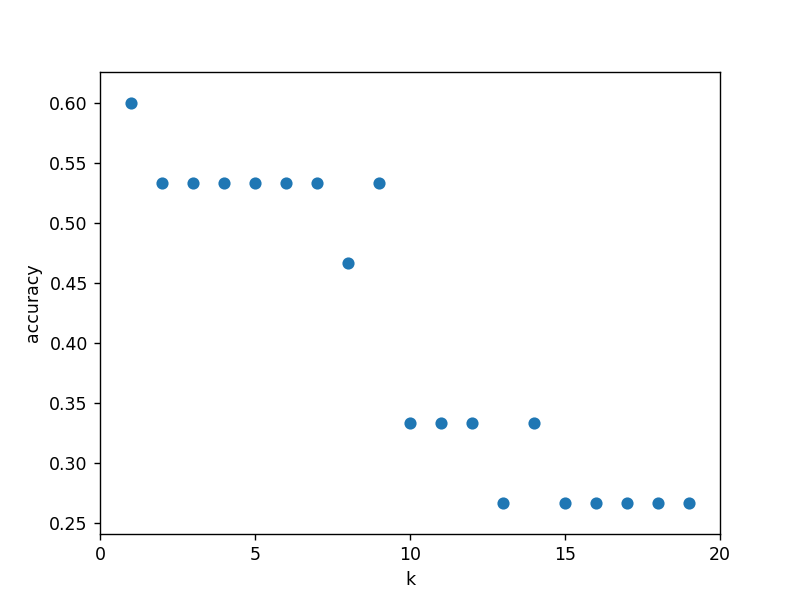

([<matplotlib.axis.XTick at 0x2d6211e6d88>,
 <a list of 5 Text xticklabel objects>)

In [45]:
k_range=range(1,20)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test,y_test))
plt.figure()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


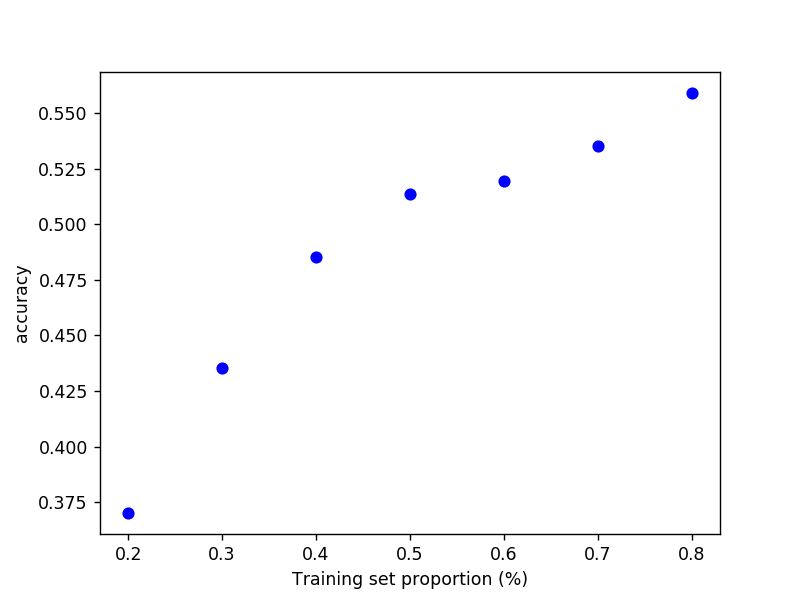

In [50]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1-s)
        knn.fit(x_train, y_train)
        scores.append(knn.score(x_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');